In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import iqr
from statistics import mode 
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.ticker as mticker
from scipy.spatial import distance
pd.options.display.float_format = '{:20,.2f}'.format

In [13]:
data = pd.read_excel('Week2_challenge_data_source.xlsx')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [15]:
data.dropna(subset=['MSISDN/Number'], inplace=True)

In [16]:
data["MSISDN/Number"]= data["MSISDN/Number"].astype(str) 

In [17]:
engagement_metrics = data.iloc[:,np.r_[0,7,28,39:55]]
engagement_metrics.head()

,Bearer Id,MSISDN/Number,Dur. (ms).1,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,33664962239.0,"1,823,652,892.00","1,545,765.00","24,420.00","1,634,479.00","1,271,433.00","3,563,542.00","137,762.00","15,854,611.00","2,501,332.00","8,198,936.00","9,656,251.00","278,082,303.00","14,344,150.00","171,744,450.00","8,814,393.00","36,749,741.00","308,879,636.00"
1,13114483482878900224,33681854413.0,"1,365,104,371.00","1,926,113.00","7,165.00","3,493,924.00","920,172.00","629,046.00","308,339.00","20,247,395.00","19,111,729.00","18,338,413.00","17,227,132.00","608,750,074.00","1,170,709.00","526,904,238.00","15,055,145.00","53,800,391.00","653,384,965.00"
2,13114483484080500736,33760627129.0,"1,361,762,651.00","1,684,053.00","42,224.00","8,535,055.00","1,694,064.00","2,690,151.00","672,973.00","19,725,661.00","14,699,576.00","17,587,794.00","6,163,408.00","229,584,621.00","395,630.00","410,692,588.00","4,215,763.00","27,883,638.00","279,807,335.00"
3,13114483485442799616,33750343200.0,"1,321,509,685.00","644,121.00","13,372.00","9,023,734.00","2,788,027.00","1,439,754.00","631,229.00","21,388,122.00","15,146,643.00","13,994,646.00","1,097,942.00","799,538,153.00","10,849,722.00","749,039,933.00","12,797,283.00","43,324,218.00","846,028,530.00"
4,13114483499480700928,33699795932.0,"1,089,009,389.00","862,600.00","50,188.00","6,248,284.00","1,500,559.00","1,936,496.00","173,853.00","15,259,380.00","18,962,873.00","17,124,581.00","415,218.00","527,707,248.00","3,529,801.00","550,709,500.00","13,910,322.00","38,542,814.00","569,138,589.00"


In [18]:
median = engagement_metrics['Dur. (ms).1'].quantile(0.50)
upper = engagement_metrics['Dur. (ms).1'].quantile(0.95)
engagement_metrics['Dur. (ms).1'] = np.where(engagement_metrics['Dur. (ms).1'] > upper, median, engagement_metrics['Dur. (ms).1'])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
median = engagement_metrics['Social Media DL (Bytes)'].quantile(0.50)
upper = engagement_metrics['Social Media DL (Bytes)'].quantile(0.95)
engagement_metrics['Social Media DL (Bytes)'] = np.where(engagement_metrics['Social Media DL (Bytes)'] > upper, median, engagement_metrics['Social Media DL (Bytes)'])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
median = engagement_metrics['Social Media UL (Bytes)'].quantile(0.50)
upper = engagement_metrics['Social Media UL (Bytes)'].quantile(0.95)
engagement_metrics['Social Media UL (Bytes)'] = np.where(engagement_metrics['Social Media UL (Bytes)'] > upper, median, engagement_metrics['Social Media UL (Bytes)'])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
median = engagement_metrics['Google DL (Bytes)'].quantile(0.50)
upper = engagement_metrics['Google DL (Bytes)'].quantile(0.95)
engagement_metrics['Google DL (Bytes)'] = np.where(engagement_metrics['Google DL (Bytes)'] > upper, median, engagement_metrics['Google DL (Bytes)'])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
median = engagement_metrics['Google UL (Bytes)'].quantile(0.50)
upper = engagement_metrics['Google UL (Bytes)'].quantile(0.95)
engagement_metrics['Google UL (Bytes)'] = np.where(engagement_metrics['Google UL (Bytes)'] > upper, median, engagement_metrics['Google UL (Bytes)'])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
median = engagement_metrics['Email DL (Bytes)'].quantile(0.50)
upper = engagement_metrics['Email DL (Bytes)'].quantile(0.95)
engagement_metrics['Email DL (Bytes)'] = np.where(engagement_metrics['Email DL (Bytes)'] > upper, median, engagement_metrics['Email DL (Bytes)'])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
median = engagement_metrics['Email UL (Bytes)'].quantile(0.50)
upper = engagement_metrics['Email UL (Bytes)'].quantile(0.95)
engagement_metrics['Email UL (Bytes)'] = np.where(engagement_metrics['Email UL (Bytes)'] > upper, median, engagement_metrics['Email UL (Bytes)'])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
median = engagement_metrics['Youtube DL (Bytes)'].quantile(0.50)
upper = engagement_metrics['Youtube DL (Bytes)'].quantile(0.95)
engagement_metrics['Youtube DL (Bytes)'] = np.where(engagement_metrics['Youtube DL (Bytes)'] > upper, median, engagement_metrics['Youtube DL (Bytes)'])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
median = engagement_metrics['Youtube UL (Bytes)'].quantile(0.50)
upper = engagement_metrics['Youtube UL (Bytes)'].quantile(0.95)
engagement_metrics['Youtube UL (Bytes)'] = np.where(engagement_metrics['Youtube UL (Bytes)'] > upper, median, engagement_metrics['Youtube UL (Bytes)'])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
median = engagement_metrics['Netflix DL (Bytes)'].quantile(0.50)
upper = engagement_metrics['Netflix DL (Bytes)'].quantile(0.95)
engagement_metrics['Netflix DL (Bytes)'] = np.where(engagement_metrics['Netflix DL (Bytes)'] > upper, median, engagement_metrics['Netflix DL (Bytes)'])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
median = engagement_metrics['Netflix UL (Bytes)'].quantile(0.50)
upper = engagement_metrics['Netflix UL (Bytes)'].quantile(0.95)
engagement_metrics['Netflix UL (Bytes)'] = np.where(engagement_metrics['Netflix UL (Bytes)'] > upper, median, engagement_metrics['Netflix UL (Bytes)'])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
median = engagement_metrics['Gaming DL (Bytes)'].quantile(0.50)
upper = engagement_metrics['Gaming DL (Bytes)'].quantile(0.95)
engagement_metrics['Gaming DL (Bytes)'] = np.where(engagement_metrics['Gaming DL (Bytes)'] > upper, median, engagement_metrics['Gaming DL (Bytes)'])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
median = engagement_metrics['Gaming UL (Bytes)'].quantile(0.50)
upper = engagement_metrics['Gaming UL (Bytes)'].quantile(0.95)
engagement_metrics['Gaming UL (Bytes)'] = np.where(engagement_metrics['Gaming UL (Bytes)'] > upper, median, engagement_metrics['Gaming UL (Bytes)'])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
median = engagement_metrics['Other DL (Bytes)'].quantile(0.50)
upper = engagement_metrics['Other DL (Bytes)'].quantile(0.95)
engagement_metrics['Other DL (Bytes)'] = np.where(engagement_metrics['Other DL (Bytes)'] > upper, median, engagement_metrics['Other DL (Bytes)'])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
median = engagement_metrics['Other UL (Bytes)'].quantile(0.50)
upper = engagement_metrics['Other UL (Bytes)'].quantile(0.95)
engagement_metrics['Other UL (Bytes)'] = np.where(engagement_metrics['Other UL (Bytes)'] > upper, median, engagement_metrics['Other UL (Bytes)'])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
median = engagement_metrics['Total UL (Bytes)'].quantile(0.50)
upper = engagement_metrics['Total UL (Bytes)'].quantile(0.95)
engagement_metrics['Total UL (Bytes)'] = np.where(engagement_metrics['Total UL (Bytes)'] > upper, median, engagement_metrics['Total UL (Bytes)'])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
median = engagement_metrics['Total DL (Bytes)'].quantile(0.50)
upper = engagement_metrics['Total DL (Bytes)'].quantile(0.95)
engagement_metrics['Total DL (Bytes)'] = np.where(engagement_metrics['Total DL (Bytes)'] > upper, median, engagement_metrics['Total DL (Bytes)'])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
engagement_metrics['Total_Data_Social_Media_Bytes'] = engagement_metrics['Social Media DL (Bytes)'] + engagement_metrics['Social Media UL (Bytes)']
engagement_metrics['Total_Data_Google_Bytes'] = engagement_metrics['Google DL (Bytes)'] + engagement_metrics['Google UL (Bytes)']
engagement_metrics['Total_Data_Email_Bytes'] = engagement_metrics['Email DL (Bytes)'] + engagement_metrics['Email UL (Bytes)']
engagement_metrics['Total_Data_Youtube_Bytes'] = engagement_metrics['Youtube DL (Bytes)'] + engagement_metrics['Youtube UL (Bytes)']
engagement_metrics['Total_Data_Netflix_Bytes'] = engagement_metrics['Netflix DL (Bytes)'] + engagement_metrics['Netflix UL (Bytes)']
engagement_metrics['Total_Data_Gaming_Bytes'] = engagement_metrics['Gaming DL (Bytes)'] + engagement_metrics['Gaming UL (Bytes)']
engagement_metrics['Total_Data_Other_Bytes'] = engagement_metrics['Other DL (Bytes)'] + engagement_metrics['Other UL (Bytes)']
engagement_metrics['Total_UL_DL_Bytes'] = engagement_metrics['Total UL (Bytes)'] + engagement_metrics['Total DL (Bytes)']

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [36]:
engagement_metrics.head()

,Bearer Id,MSISDN/Number,Dur. (ms).1,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),...,Total UL (Bytes),Total DL (Bytes),Total_Data_Social_Media_Bytes,Total_Data_Google_Bytes,Total_Data_Email_Bytes,Total_Data_Youtube_Bytes,Total_Data_Netflix_Bytes,Total_Data_Gaming_Bytes,Total_Data_Other_Bytes,Total_UL_DL_Bytes
0,13114483460844900352,33664962239.0,"86,399,985.00","1,545,765.00","24,420.00","1,634,479.00","1,271,433.00","1,793,585.00","137,762.00","15,854,611.00",...,"36,749,741.00","308,879,636.00","1,570,185.00","2,905,912.00","1,931,347.00","18,355,943.00","17,855,187.00","292,426,453.00","180,558,843.00","345,629,377.00"
1,13114483482878900224,33681854413.0,"86,399,985.00","1,926,113.00","7,165.00","3,493,924.00","920,172.00","629,046.00","308,339.00","20,247,395.00",...,"53,800,391.00","653,384,965.00","1,933,278.00","4,414,096.00","937,385.00","39,359,124.00","35,565,545.00","609,920,783.00","541,959,383.00","707,185,356.00"
2,13114483484080500736,33760627129.0,"86,399,985.00","1,684,053.00","42,224.00","8,535,055.00","1,694,064.00","2,690,151.00","672,973.00","19,725,661.00",...,"27,883,638.00","279,807,335.00","1,726,277.00","10,229,119.00","3,363,124.00","34,425,237.00","23,751,202.00","229,980,251.00","414,908,351.00","307,690,973.00"
3,13114483485442799616,33750343200.0,"86,399,985.00","644,121.00","13,372.00","9,023,734.00","2,788,027.00","1,439,754.00","631,229.00","21,388,122.00",...,"43,324,218.00","455,870,838.00","657,493.00","11,811,761.00","2,070,983.00","36,534,765.00","15,092,588.00","810,387,875.00","761,837,216.00","499,195,056.00"
4,13114483499480700928,33699795932.0,"86,399,985.00","862,600.00","50,188.00","6,248,284.00","1,500,559.00","1,936,496.00","173,853.00","15,259,380.00",...,"38,542,814.00","569,138,589.00","912,788.00","7,748,843.00","2,110,349.00","34,222,253.00","17,539,799.00","531,237,049.00","564,619,822.00","607,681,403.00"


In [37]:
aggregated_metrics_session_frequency= engagement_metrics.groupby('MSISDN/Number').agg({'Bearer Id': 'count'}).sort_values('Bearer Id',ascending=False)
aggregated_metrics_session_frequency.head(10)

,Bearer Id
MSISDN/Number,
33626320676.0,18
33614892860.0,17
33625779332.0,17
33659725664.0,16
33760536639.0,15
33675877202.0,15
33667163239.0,13
33627080969.0,12
33604515716.0,12


In [38]:
aggregated_metrics_session_duration = engagement_metrics.groupby('MSISDN/Number').agg({'Dur. (ms).1': 'sum'}).sort_values('Dur. (ms).1',ascending=False)
aggregated_metrics_session_duration.head(10)

,Dur. (ms).1
MSISDN/Number,
33659725664.0,"1,905,490,627.00"
33626320676.0,"1,785,435,064.00"
33659359429.0,"1,748,001,747.00"
33675877202.0,"1,745,144,213.00"
33614892860.0,"1,678,411,590.00"
33760536639.0,"1,651,096,372.00"
33625779332.0,"1,599,068,051.00"
33786323068.0,"1,427,817,262.00"
33664712899.0,"1,334,990,834.00"


In [26]:
type(aggregated_metrics_session_duration)

pandas.core.frame.DataFrame

In [39]:
aggregated_metrics_session_total_traffic= engagement_metrics.groupby('MSISDN/Number').agg({'Total_UL_DL_Bytes': 'sum'}).sort_values('Total_UL_DL_Bytes',ascending=False)
aggregated_metrics_session_total_traffic.head(10)

,Total_UL_DL_Bytes
MSISDN/Number,
33760536639.0,"8,495,064,851.00"
33614892860.0,"7,993,353,984.00"
33625779332.0,"7,672,477,016.00"
33626320676.0,"7,558,825,363.00"
33675877202.0,"7,511,923,738.00"
33659725664.0,"6,883,042,039.00"
33664712899.0,"6,437,313,084.00"
33666464084.0,"6,140,611,160.00"
33698792269.0,"6,080,141,255.00"


In [40]:
type(aggregated_metrics_session_total_traffic)

pandas.core.frame.DataFrame

In [41]:
aggregated_metrics= engagement_metrics.groupby('MSISDN/Number').agg({'Bearer Id': 'count','Dur. (ms).1': 'sum','Total_UL_DL_Bytes': 'sum'}).sort_values(['Bearer Id','Dur. (ms).1','Total_UL_DL_Bytes'], ascending=[False, False, False])
aggregated_metrics

,Bearer Id,Dur. (ms).1,Total_UL_DL_Bytes
MSISDN/Number,,,
33626320676.0,18,"1,785,435,064.00","7,558,825,363.00"
33614892860.0,17,"1,678,411,590.00","7,993,353,984.00"
33625779332.0,17,"1,599,068,051.00","7,672,477,016.00"
33659725664.0,16,"1,905,490,627.00","6,883,042,039.00"
33675877202.0,15,"1,745,144,213.00","7,511,923,738.00"
...,...,...,...
33650431620.0,1,"7,267,018.00","208,893,702.00"
33698390293.0,1,"7,258,080.00","836,659,601.00"
33659328207.0,1,"7,189,000.00","259,533,861.00"


In [42]:
x = aggregated_metrics.values
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(scaled_array)
X = df_normalized.values

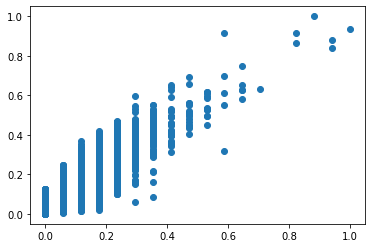

In [43]:
plt.scatter(X[:,0],X[:,1], label='True Position')
plt.show()

In [44]:
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [45]:
print(kmeans.labels_)

[1 1 1 ... 2 2 2]


In [46]:
print(kmeans.cluster_centers_)

[[0.06682971 0.09928449 0.12058412]
 [0.18593448 0.22472012 0.24003674]
 [0.00233192 0.04516013 0.05251799]]


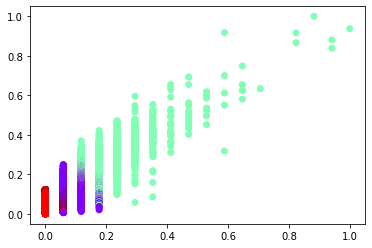

In [47]:
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')

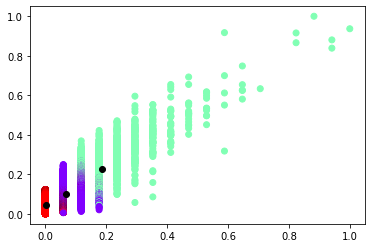

In [86]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.savefig('scater_2.png', dpi=300)

In [49]:
aggregated_metrics['cluster'] = kmeans.labels_

In [50]:
aggregated_metrics.columns

Index(['Bearer Id', 'Dur. (ms).1', 'Total_UL_DL_Bytes', 'cluster'], dtype='object')

In [51]:
customer_segments = aggregated_metrics.groupby('cluster', as_index=False).agg({'Bearer Id': ['min', 'max', 'mean','sum'], 
                                                              'Dur. (ms).1': ['min', 'max', 'mean','sum'],
                                                              'Total_UL_DL_Bytes': ['min', 'max', 'mean','sum']}).rename(columns={'Bearer Id': 'Session Frequency', 
                                                                                                                                  'Dur. (ms).1': 'Duration of session(ms)',
                                                                                                                                'Total_UL_DL_Bytes': 'Sessions total traffic(bytes)'})         

In [52]:
customer_segments

cluster Session Frequency                                  \
                        min max                 mean    sum   
0       0                 1   4                 2.14  46563   
1       1                 3  18                 4.16  18574   
2       2                 1   2                 1.04  83798   

  Duration of session(ms)                                            \
                      min                  max                 mean   
0           18,235,797.00       514,317,346.00       195,676,430.75   
1           85,556,232.00     1,905,490,627.00       433,895,272.18   
2            7,142,988.00       261,422,541.00        92,875,669.93   

                       Sessions total traffic(bytes)                       \
                   sum                           min                  max   
0 4,264,572,131,725.00                167,774,602.00     2,345,859,442.00   
1 1,936,040,704,471.00                661,851,764.00     8,495,064,851.00   
2 7,485,778,996,141.00                 33,249,009.00       994,853,015.00   

                                              
                  mean                   sum  
0     1,053,830,852.40 22,967,189,597,273.00  
1     2,065,221,546.80  9,215,018,541,843.00  
2       477,664,575.06 38,499,764,749,764.00

Text(0, 0.5, 'Values')

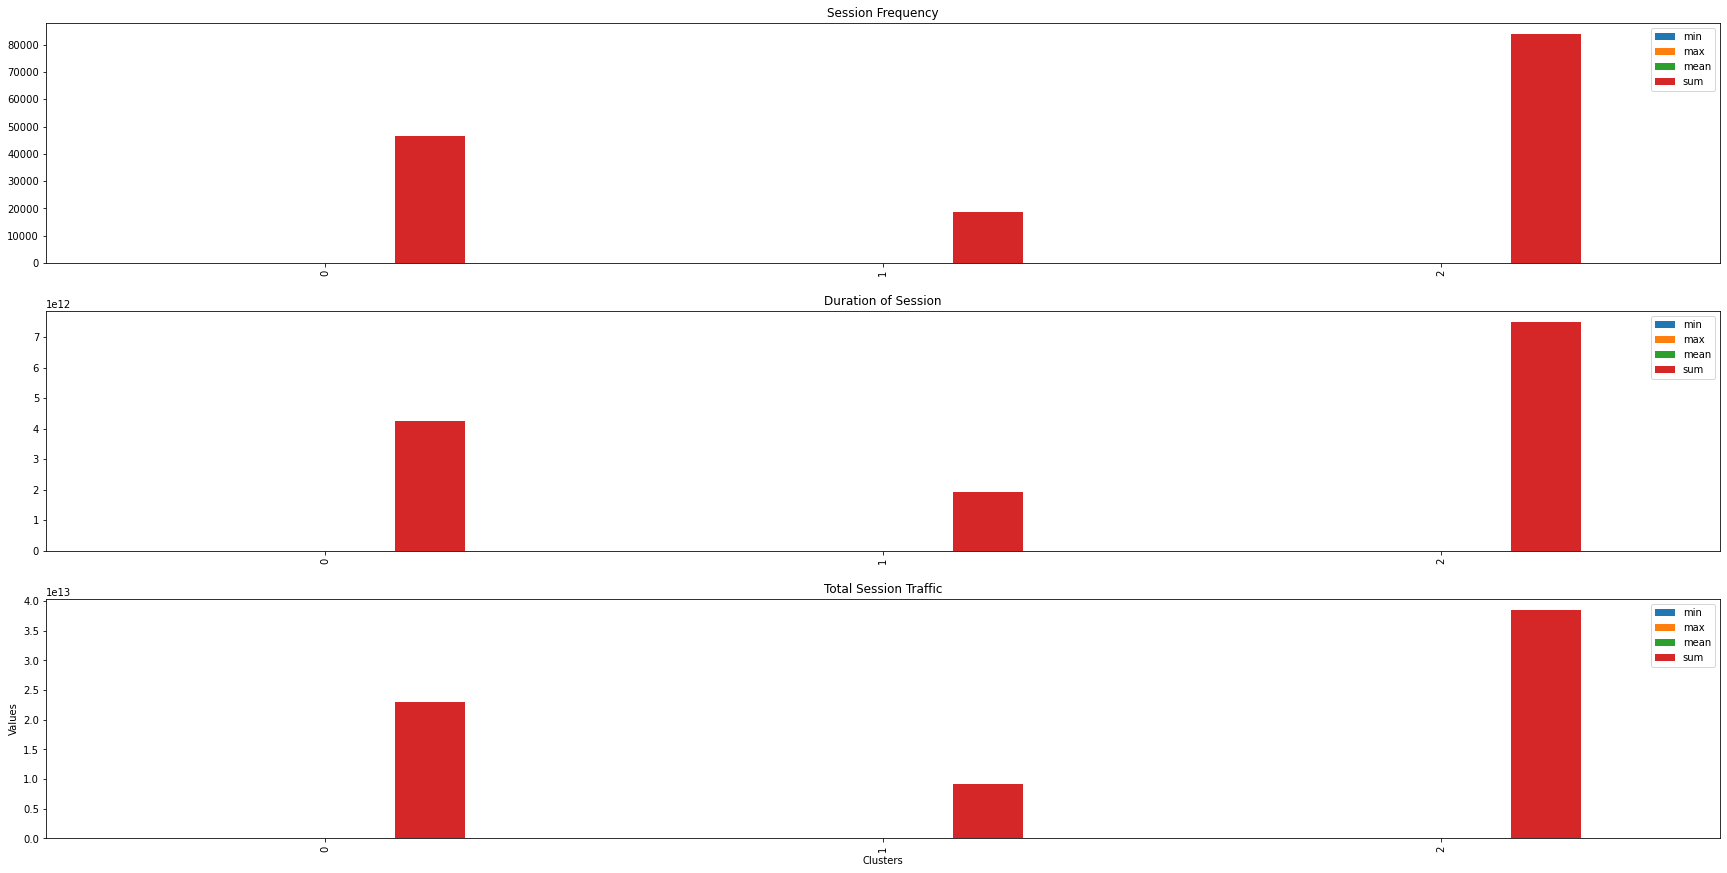

In [82]:
f, a = plt.subplots(3,1, figsize=(30,15))

customer_segments['Session Frequency'].plot(kind='bar',ax=a[0], title='Session Frequency')
customer_segments['Duration of session(ms)'].plot(kind='bar',ax=a[1], title='Duration of Session')
customer_segments['Sessions total traffic(bytes)'].plot(kind='bar',ax=a[2], title='Total Session Traffic')
plt.xlabel('Clusters')
plt.ylabel('Values')


In [54]:
aggregated_metrics_social_media= engagement_metrics.groupby('MSISDN/Number').agg({'Total_Data_Social_Media_Bytes': 'sum'}).sort_values('Total_Data_Social_Media_Bytes',ascending=False)
aggregated_metrics_social_media.head(10)

,Total_Data_Social_Media_Bytes
MSISDN/Number,
33626320676.0,"41,727,859.00"
33760536639.0,"38,085,429.00"
33659725664.0,"32,113,182.00"
33614892860.0,"28,264,217.00"
33667163239.0,"24,217,797.00"
33669068942.0,"23,800,834.00"
33625779332.0,"23,627,523.00"
33665530316.0,"22,586,033.00"
33603127838.0,"21,393,015.00"


In [55]:
aggregated_metrics_google= engagement_metrics.groupby('MSISDN/Number').agg({'Total_Data_Google_Bytes': 'sum'}).sort_values('Total_Data_Google_Bytes',ascending=False)
aggregated_metrics_google.head(10)

,Total_Data_Google_Bytes
MSISDN/Number,
33626320676.0,"144,450,669.00"
33625779332.0,"138,284,943.00"
33614892860.0,"126,116,037.00"
33760536639.0,"117,375,166.00"
33659725664.0,"116,516,345.00"
33675877202.0,"109,860,502.00"
33786323068.0,"102,544,112.00"
33667163239.0,"95,627,881.00"
33665083783.0,"87,634,510.00"


In [56]:
aggregated_metrics_email= engagement_metrics.groupby('MSISDN/Number').agg({'Total_Data_Email_Bytes': 'sum'}).sort_values('Total_Data_Email_Bytes',ascending=False)
aggregated_metrics_email.head(10)

,Total_Data_Email_Bytes
MSISDN/Number,
33625779332.0,"40,205,275.00"
33614892860.0,"39,022,490.00"
33626320676.0,"38,590,971.00"
33659725664.0,"34,256,895.00"
33760536639.0,"32,000,565.00"
33786323068.0,"30,811,927.00"
33675877202.0,"30,608,647.00"
33667163239.0,"29,880,069.00"
33698792269.0,"29,059,042.00"


In [57]:
aggregated_metrics_youtube= engagement_metrics.groupby('MSISDN/Number').agg({'Total_Data_Youtube_Bytes': 'sum'}).sort_values('Total_Data_Youtube_Bytes',ascending=False)
aggregated_metrics_youtube.head(10)

,Total_Data_Youtube_Bytes
MSISDN/Number,
33625779332.0,"410,157,967.00"
33626320676.0,"374,483,047.00"
33614892860.0,"372,341,135.00"
33760536639.0,"363,149,166.00"
33675877202.0,"306,644,317.00"
33667163239.0,"304,694,644.00"
33760413819.0,"292,194,443.00"
33627080969.0,"287,229,220.00"
33603127838.0,"272,916,825.00"


In [58]:
aggregated_metrics_netflix= engagement_metrics.groupby('MSISDN/Number').agg({'Total_Data_Netflix_Bytes': 'sum'}).sort_values('Total_Data_Netflix_Bytes',ascending=False)
aggregated_metrics_netflix.head(10)

,Total_Data_Netflix_Bytes
MSISDN/Number,
33659725664.0,"399,519,079.00"
33614892860.0,"361,401,046.00"
33625779332.0,"334,559,926.00"
33760536639.0,"323,723,328.00"
33626320676.0,"317,920,470.00"
33667163239.0,"313,939,488.00"
33675877202.0,"309,093,159.00"
33760413819.0,"308,004,490.00"
33786323068.0,"273,353,355.00"


In [59]:
aggregated_metrics_gaming= engagement_metrics.groupby('MSISDN/Number').agg({'Total_Data_Gaming_Bytes': 'sum'}).sort_values('Total_Data_Gaming_Bytes',ascending=False)
aggregated_metrics_gaming.head(10)

,Total_Data_Gaming_Bytes
MSISDN/Number,
33760536639.0,"7,445,629,980.00"
33675877202.0,"6,954,881,291.00"
33614892860.0,"6,554,568,551.00"
33625779332.0,"6,526,869,295.00"
33626320676.0,"6,490,249,704.00"
33659725664.0,"5,929,801,953.00"
33664712899.0,"5,689,296,747.00"
33666464084.0,"5,459,900,187.00"
33760413819.0,"5,448,335,365.00"


In [60]:
aggregated_metrics_other= engagement_metrics.groupby('MSISDN/Number').agg({'Total_Data_Other_Bytes': 'sum'}).sort_values('Total_Data_Other_Bytes',ascending=False)
aggregated_metrics_other.head(10)

,Total_Data_Other_Bytes
MSISDN/Number,
33626320676.0,"7,787,333,560.00"
33614892860.0,"7,235,055,309.00"
33675877202.0,"6,798,515,150.00"
33625779332.0,"6,354,583,086.00"
33659725664.0,"6,300,940,127.00"
33626948251.0,"5,297,438,674.00"
33627080969.0,"5,117,790,890.00"
33603127838.0,"5,107,940,438.00"
33667163239.0,"4,941,518,794.00"


In [61]:
applications = engagement_metrics.iloc[:,np.r_[19:26]]

In [62]:
applications.loc['Total',:]= applications.sum(axis=0)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [63]:
applications

,Total_Data_Social_Media_Bytes,Total_Data_Google_Bytes,Total_Data_Email_Bytes,Total_Data_Youtube_Bytes,Total_Data_Netflix_Bytes,Total_Data_Gaming_Bytes,Total_Data_Other_Bytes
0,"1,570,185.00","2,905,912.00","1,931,347.00","18,355,943.00","17,855,187.00","292,426,453.00","180,558,843.00"
1,"1,933,278.00","4,414,096.00","937,385.00","39,359,124.00","35,565,545.00","609,920,783.00","541,959,383.00"
2,"1,726,277.00","10,229,119.00","3,363,124.00","34,425,237.00","23,751,202.00","229,980,251.00","414,908,351.00"
3,"657,493.00","11,811,761.00","2,070,983.00","36,534,765.00","15,092,588.00","810,387,875.00","761,837,216.00"
4,"912,788.00","7,748,843.00","2,110,349.00","34,222,253.00","17,539,799.00","531,237,049.00","564,619,822.00"
...,...,...,...,...,...,...,...
149996,"1,845,857.00","12,784,914.00","690,876.00","27,955,095.00","37,561,864.00","535,806,880.00","16,751,926.00"
149997,"2,352,181.00","4,415,361.00","2,121,718.00","22,165,518.00","30,345,773.00","631,628,095.00","714,638,145.00"
149998,"1,260,239.00","6,585,469.00","2,058,277.00","13,472,286.00","15,029,702.00","566,933,800.00","132,415,585.00"
149999,"823,109.00","7,757,267.00","2,850,914.00","17,122,508.00","16,494,842.00","355,066,446.00","423,278,504.00"


In [64]:
applications.sort_values(by='Total', axis=1, ascending=False,inplace=True)

In [65]:
applications

,Total_Data_Gaming_Bytes,Total_Data_Other_Bytes,Total_Data_Youtube_Bytes,Total_Data_Netflix_Bytes,Total_Data_Google_Bytes,Total_Data_Email_Bytes,Total_Data_Social_Media_Bytes
0,"292,426,453.00","180,558,843.00","18,355,943.00","17,855,187.00","2,905,912.00","1,931,347.00","1,570,185.00"
1,"609,920,783.00","541,959,383.00","39,359,124.00","35,565,545.00","4,414,096.00","937,385.00","1,933,278.00"
2,"229,980,251.00","414,908,351.00","34,425,237.00","23,751,202.00","10,229,119.00","3,363,124.00","1,726,277.00"
3,"810,387,875.00","761,837,216.00","36,534,765.00","15,092,588.00","11,811,761.00","2,070,983.00","657,493.00"
4,"531,237,049.00","564,619,822.00","34,222,253.00","17,539,799.00","7,748,843.00","2,110,349.00","912,788.00"
...,...,...,...,...,...,...,...
149996,"535,806,880.00","16,751,926.00","27,955,095.00","37,561,864.00","12,784,914.00","690,876.00","1,845,857.00"
149997,"631,628,095.00","714,638,145.00","22,165,518.00","30,345,773.00","4,415,361.00","2,121,718.00","2,352,181.00"
149998,"566,933,800.00","132,415,585.00","13,472,286.00","15,029,702.00","6,585,469.00","2,058,277.00","1,260,239.00"
149999,"355,066,446.00","423,278,504.00","17,122,508.00","16,494,842.00","7,757,267.00","2,850,914.00","823,109.00"


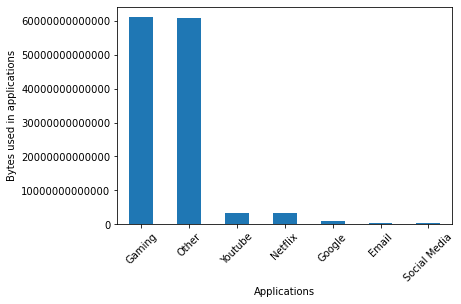

In [84]:

fig = plt.figure()

ax = fig.add_subplot(111)

applications.iloc[-1].plot(kind='bar', ax=ax)
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.xlabel('Applications')
plt.ylabel('Bytes used in applications')
ax.set_xticklabels(['Gaming', 'Other', 'Youtube', 'Netflix', 'Google', 'Email', 'Social Media'], rotation=45)
plt.savefig('app.png', dpi=300, bbox_inches="tight")
plt.show()

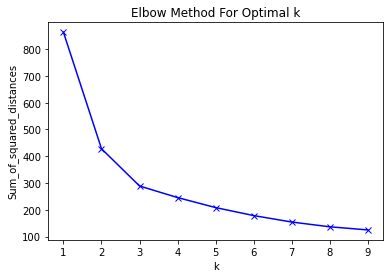

In [85]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.savefig('elbow.png', dpi=300)
plt.show()

In [69]:
kmeans.cluster_centers_

array([[0.06682971, 0.09928449, 0.12058412],
       [0.18593448, 0.22472012, 0.24003674],
       [0.00233192, 0.04516013, 0.05251799]])

In [70]:
arr = np.mean(kmeans.cluster_centers_, axis = 1) 
arr

array([0.09556611, 0.21689711, 0.03333668])

In [71]:
X

array([[1.00000000e+00, 9.36757862e-01, 8.89357142e-01],
       [9.41176471e-01, 8.80380689e-01, 9.40708841e-01],
       [9.41176471e-01, 8.38584583e-01, 9.02788261e-01],
       ...,
       [0.00000000e+00, 2.42379209e-05, 2.67418786e-02],
       [0.00000000e+00, 1.88901123e-06, 7.62564907e-02],
       [0.00000000e+00, 0.00000000e+00, 6.20535703e-02]])

In [73]:
least = kmeans.cluster_centers_[2]
least

array([0.00233192, 0.04516013, 0.05251799])

In [74]:
aggregated_metrics.index

Index(['33626320676.0', '33614892860.0', '33625779332.0', '33659725664.0',
       '33675877202.0', '33760536639.0', '33667163239.0', '33786323068.0',
       '33760413819.0', '33627080969.0',
       ...
       '33668447927.0', '33781461394.0', '33605337688.0', '33666843846.0',
       '33662464387.0', '33650431620.0', '33698390293.0', '33659328207.0',
       '33665660120.0', '33763505878.0'],
      dtype='object', name='MSISDN/Number', length=106856)

In [77]:
distances = []
for i in X:
    d = distance.euclidean(i, least)
    distances.append(d)

In [78]:
distances

[1.5781596455350786,
 1.5388000022447483,
 1.4946273693682863,
 1.503053403899899,
 1.4570412402502733,
 1.498616697605507,
 1.100087151836744,
 1.1312904583702872,
 1.0931544637373354,
 1.0685840390034866,
 1.023425251299477,
 0.9925912579633424,
 1.1608478685304597,
 1.1258115178130441,
 1.0546745118972811,
 1.0183737683885508,
 0.7628397680274431,
 0.9880289380997914,
 1.0160475881185322,
 0.9740581852547134,
 0.916021907897922,
 0.9541083870964894,
 0.8650962523057157,
 0.8492532265381224,
 0.8072432391344605,
 0.8633989716968117,
 0.8676923914783295,
 0.7690899056835376,
 0.7786237001975521,
 0.9206303913721131,
 0.8642301212229649,
 0.8406576340682046,
 0.8473134974697365,
 0.8074490268637485,
 0.8480570833560326,
 0.7469550439224577,
 0.7090118846871939,
 0.7281845259203049,
 0.7878062709293295,
 0.8019611384722374,
 0.7617182998211818,
 0.8165724612791083,
 0.81008466389171,
 0.7309073343651666,
 0.7639064171555686,
 0.7710372999513915,
 0.8322371573006636,
 0.8290137762526593,

In [79]:
d = {'Customer_Number': aggregated_metrics.index, 'Engagement_Score': distances}
engagement_score = pd.DataFrame(d)
engagement_score

,Customer_Number,Engagement_Score
0,33626320676.0,1.58
1,33614892860.0,1.54
2,33625779332.0,1.49
3,33659725664.0,1.50
4,33675877202.0,1.46
...,...,...
106851,33650431620.0,0.06
106852,33698390293.0,0.06
106853,33659328207.0,0.05
106854,33665660120.0,0.05


In [80]:
engagement_score.to_csv('engagement.csv', index=False)